# Denoising using (noisy) signal averaging
By simulation, check that the averaging several instances of the same (in most of the cases, zero-mean) noisy signal (*stacking*) approximates to the clean signal. 1D and 2D cases are analyzed. Additive and multiplicative (speckle), i.e., signal-dependent noise are considered.

We define:

* $X=\text{clean signal.}$
* $N=\text{noise.}$
* $Y=\text{noisy signal.}$

Simulations check that
\begin{equation}
  {\mathbb E}(Y)=X,
\end{equation}
being, in general, $Y=f(X,N)$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from collections import namedtuple
from skimage import io as skimage_io  # pip install scikit-image
import information_theory as IT # pip install "information_theory @ git+https://github.com/vicente-gonzalez-ruiz/information_theory"

In [ ]:
Args = namedtuple("args", "input")
args = Args("http://www.hpca.ual.es/~vruiz/images/barb.png")

In [ ]:
image = skimage_io.imread(args.input)  # Ground Truth
image.mean()

In [ ]:
#mean = np.mean(image)
#zero_mean_image = image.astype(np.float32) - mean
#print(np.mean(zero_mean_image))

In [ ]:
min_PSNR = 60  # Minimum quality to stop averaging

## Additive uniform noise
\begin{equation}
  Y = X + N,~N\sim{\mathcal U}(-c, c).
\end{equation}

### 1D

In [ ]:
X = np.arange(101) - 50
X

In [ ]:
X.mean()

In [ ]:
N = np.random.uniform(low=-10, high=10, size=X.size)#.astype(np.int32)
N.mean()

In [ ]:
Y = X + N

In [ ]:
plt.title("effect of additive uniform noise")
plt.plot(X, label="$X$")
plt.plot(Y, label="$Y$")
plt.ylabel("intensity")
plt.xlabel("sample")
plt.legend()
plt.show()

In [ ]:
X = np.arange(101)
c = 10
iters = 100
acc_Y = np.zeros_like(X)
min_Y = np.ones_like(X) * 1000
max_Y = -np.ones_like(X)
for i in range(iters):
    N = np.random.uniform(low=-c, high=c, size=len(X))
    Y = X + N
    min_Y = np.minimum(Y, min_Y)
    max_Y = np.maximum(Y, max_Y)
    acc_Y = acc_Y + Y
average_Y = acc_Y / (i + 1)

In [ ]:
plt.title("Averaging signals corrupted by additive uniform noise")
#plt.plot(average_Y, label=r"$\mathbb{E}_{iters}(Y)$")
plt.plot(average_Y, label=rf"$\mathbb{{E}}_{{\text{{{iters}}}}}(Y)$")
#plt.plot(np.random.poisson(X * _lambda) /  _lambda, label="$Y$ (example)")
plt.plot(max_Y, label="max($Y$)")
plt.plot(min_Y, label="min($Y$)")
plt.plot(X, label="$X$")
plt.ylabel("intensity")
plt.xlabel("sample")
plt.legend()
plt.show()

### 2D

In [ ]:
X = image
curves = []
for c in range(10, 100, 10):
    acc_denoised = np.zeros_like(X, dtype=np.float64)
    PSNR = 1
    iters = 1
    curve = []
    while PSNR < min_PSNR:
        N = np.random.uniform(low=-c, high=c, size=image.shape).reshape(image.shape)
        Y = X.astype(np.float32) + N
        #plt.imshow(N, cmap="gray")
        #plt.show()
        acc_denoised += Y
        denoised = acc_denoised/iters
        PSNR = IT.distortion.PSNR(denoised, X)
        print(c, iters, PSNR)
        curve.append(PSNR)
        iters += 1
        #plt.imshow(denoised, cmap="gray")
        #plt.show()
        #input()

    curves.append(curve)
    print()

In [ ]:
plt.title("denoising performance averaging images with Rician noise")
for i in range(len(curves)):
    plt.plot(curves[i], label=i)
    #print(i)
plt.ylabel("intensity")
plt.xlabel("sample")
plt.legend()
plt.show()

### An example of real additive (modeled as uniform) noise: quantization noise
Generated by a dead-zone uniform quantizer.

In [ ]:
X = np.arange(101) - 50
Y = (X/10).astype(np.int16) * 10

In [ ]:
Y.mean()

In [ ]:
plt.title("example of quantization noise")
plt.plot(X, label="signal")
plt.plot(Y, label="quantized signal")
plt.ylabel("intensity")
plt.xlabel("sample")
plt.legend()
plt.show()

## Multiplicative uniform noise
\begin{equation}
  Y = X (1 + N),~N\sim{\mathcal U}(-c, c).
\end{equation}

### 1D

In [ ]:
X = np.arange(101) - 50

In [ ]:
#N = np.random.uniform(low=-signal/10, high=signal/10)
N = np.random.uniform(low=-5, high=5, size=X.size)
N.mean()

In [ ]:
Y = X * (1 + N)

In [ ]:
plt.title("effect of multiplicative uniform noise")
plt.plot(X, label="$X$")
plt.plot(Y, label="$Y$")
plt.ylabel("intensity")
plt.xlabel("sample")
plt.legend()
plt.show()

In [ ]:
X = np.arange(101)
c = 10
iters = 100
acc_Y = np.zeros_like(X)
min_Y = np.ones_like(X) * 1000
max_Y = -np.ones_like(X)
for i in range(iters):
    N = np.random.uniform(low=-c, high=c, size=len(X))
    Y = X * (1 + N)
    min_Y = np.minimum(Y, min_Y)
    max_Y = np.maximum(Y, max_Y)
    acc_Y = acc_Y + Y
average_Y = acc_Y / (i + 1)

In [ ]:
plt.title("Averaging signals corrupted by multiplicative uniform noise")
plt.plot(average_Y, label=rf"$\mathbb{{E}}_{{\text{{{iters}}}}}(Y)$")
plt.plot(max_Y, label="max($Y$)")
plt.plot(min_Y, label="min($Y$)")
plt.plot(X, label="$X$")
plt.legend()
plt.show()

### 2D

In [ ]:
X = image
curves = []
for c in range(1, 10, 1):
    acc_denoised = np.zeros_like(X, dtype=np.float64)
    PSNR = 1
    iters = 1
    curve = []
    while PSNR < min_PSNR:
        #noise = np.random.uniform(low=-2*zero_mean_image/c, high=2*zero_mean_image/c)
        N = np.random.uniform(low=-c/10, high=c/10, size=X.size).reshape(X.shape)
        Y = X.astype(np.float32) * (1 + N)
        #print(np.max(N), np.min(N))
        #Y = np.clip(a=Y, a_min=0, a_max=255).astype(np.uint8)
        #plt.imshow(N, cmap="gray")
        #plt.show()
        acc_denoised += Y
        denoised = acc_denoised/iters
        PSNR = IT.distortion.PSNR(denoised, X)
        print(c, iters, PSNR)
        curve.append(PSNR)
        iters += 1
        #plt.imshow(denoised, cmap="gray")
        #plt.show()
        #input()

    curves.append(curve)
    print()

In [ ]:
plt.title("denoising performance averaging images with multiplicative uniform noise")
for i in range(len(curves)):
    plt.plot(curves[i], label=i)
    #print(i)
plt.ylabel("PSNR")
plt.xlabel("interation")
plt.legend()
plt.show()

## Additive Gaussian noise
\begin{equation}
  Y = X + N,~N\sim{\mathcal N}(\mu=0, \sigma).
\end{equation}

### 1D

In [ ]:
X = np.arange(101) - 50
X.mean()

In [ ]:
N = np.random.normal(loc=0, scale=10, size=X.size)
N.mean()

In [ ]:
Y = X + N

In [ ]:
plt.title("effect of additive Gaussian noise")
plt.plot(X, label="$X$")
plt.plot(Y, label="$Y$")
plt.ylabel("intensity")
plt.xlabel("sample")
plt.legend()
plt.show()

In [ ]:
X = np.arange(101) - 50
sigma = 10
iters = 100
acc_Y = np.zeros_like(X)
min_Y = np.ones_like(X) * 1000
max_Y = -np.ones_like(X) * 1000
for i in range(iters):
    N = np.random.normal(loc=0, scale=sigma, size=len(X))
    Y = X + N
    min_Y = np.minimum(Y, min_Y)
    max_Y = np.maximum(Y, max_Y)
    acc_Y = acc_Y + Y
average_Y = acc_Y / (i + 1)

In [ ]:
plt.title("Averaging signals corrupted by additive Gaussian noise")
plt.plot(average_Y, label=rf"$\mathbb{{E}}_{{\text{{{iters}}}}}(Y)$")
plt.plot(max_Y, label="max($Y$)")
plt.plot(min_Y, label="min($Y$)")
plt.plot(X, label="$X$")
plt.ylabel("intensity")
plt.xlabel("sample")
plt.legend()
plt.show()

### 2D

In [ ]:
X = image
curves = []
#sigma_index = 1
for std_dev in range(10, 50, 5):
    acc_denoised = np.zeros_like(X, dtype=np.float64)
    PSNR = 1
    iters = 1
    curve = []
    while PSNR < min_PSNR:
        N = np.random.normal(loc=0, scale=std_dev, size=X.shape).reshape(X.shape)
        Y = X.astype(np.float32) + N
        Y = np.clip(a=Y, a_min=0, a_max=255).astype(np.uint8)
        acc_denoised += Y
        denoised = acc_denoised/iters
        PSNR = IT.distortion.PSNR(denoised, X)
        print(std_dev, iters, PSNR)
        curve.append(PSNR)
        iters += 1
        #plt.imshow(denoised, cmap="gray")
        #plt.show()
        #input()

    curves.append(curve)
    #sigma_index += 1
    print()

In [ ]:
plt.title("denoising performance averaging images with additive Gaussian noise")
for i in range(len(curves)):
    plt.plot(curves[i], label=i)
    #print(i)
plt.ylabel("PSNR")
plt.xlabel("interation")
plt.legend()
plt.show()

## Multiplicative Gaussian noise
\begin{equation}
  Y = X (1 + N),~N\sim{\mathcal N}(\mu=0, \sigma).
\end{equation}

### 1D

In [ ]:
X = np.arange(101) - 50

In [ ]:
N = np.random.normal(loc=0, scale=1, size=X.size)
N.mean()

In [ ]:
Y = X * (1 + N)

In [ ]:
plt.title("effect of multiplicative Gaussian noise")
plt.plot(X, label="$X$")
plt.plot(Y, label="$Y$")
plt.ylabel("intensity")
plt.xlabel("sample")
plt.legend()
plt.show()

In [ ]:
X = np.arange(101)
c = 10
iters = 100
acc_Y = np.zeros_like(X)
min_Y = np.ones_like(X) * 1000
max_Y = -np.ones_like(X)
for i in range(iters):
    N = np.random.normal(loc=0, scale=X)
    Y = X * (1 + N)
    min_Y = np.minimum(Y, min_Y)
    max_Y = np.maximum(Y, max_Y)
    acc_Y = acc_Y + Y
average_Y = acc_Y / (i + 1)

In [ ]:
plt.title("Averaging signals corrupted by multiplicative Gaussian noise")
plt.plot(average_Y, label=rf"$\mathbb{{E}}_{{\text{{{iters}}}}}(Y)$")
plt.plot(max_Y, label="max($Y$)")
plt.plot(min_Y, label="min($Y$)")
plt.plot(X, label="$X$")
plt.legend()
plt.show()

In [ ]:
signal = np.ones(100000)
acc_means = 0.0
l = []
for i in range(1000):
    N = np.random.normal(loc=0, scale=signal)
    mean_N = np.mean(N)
    acc_means += mean_N
    average_means = acc_means / (i + 1)
    l.append(average_means)

plt.title("Average of means for zero-mean multiplicative Gaussian noise")
plt.plot(l)
plt.plot(np.zeros(1000))
plt.show()

### 2D

In [ ]:
X = image
curves = []
for std_dev in range(1, 10, 1):
    acc_denoised = np.zeros_like(X, dtype=np.float64)
    PSNR = 1
    iters = 1
    curve = []
    while PSNR < min_PSNR:
        N = np.random.normal(loc=0, scale=std_dev/15, size=X.shape).reshape(X.shape)
        Y = X.astype(np.float32) * (1 + N)
        Y = np.clip(a=Y, a_min=0, a_max=255).astype(np.uint8)
        acc_denoised += Y
        denoised = acc_denoised/iters
        PSNR = IT.distortion.PSNR(denoised.astype(np.uint8), X)
        print(std_dev, iters, PSNR)
        curve.append(PSNR)
        iters += 1
        #plt.imshow(denoised, cmap="gray")
        #plt.show()
        #input()

    curves.append(curve)
    #sigma_index += 1
    print()

In [ ]:
plt.title("denoising performance stacking images with multiplicative Gaussian noise")
for i in range(len(curves)):
    plt.plot(curves[i], label=i)
    #print(i)
plt.ylabel("PSNR")
plt.xlabel("interation")
plt.legend()
plt.show()

## Zero-mean Poisson noise (zero-mean shot noise)
\begin{equation}
  Y=\frac{N}{\alpha},~N∼\text{Poisson}(λ=\alpha X),
\end{equation}
where:
* $X\ge 0$.
* $\lambda$ is the mean of the Poisson distribution.

### 1D

In [ ]:
X = np.arange(101)
X.mean()

In [ ]:
_lambda = 0.3
Y = np.random.poisson(X * _lambda) /  _lambda
print(np.mean(Y))

In [ ]:
plt.title("Example of additive zero-mean Poisson noise")
plt.plot(X, label="$X$")
plt.plot(Y, label="$Y$")
plt.ylabel("intensity")
plt.xlabel("sample")
plt.legend()
plt.show()

In [ ]:
X = np.arange(101)
_lambda = 1
iters = 100
acc_Y = np.zeros_like(X)
min_Y = np.ones_like(X) * 1000
max_Y = -np.ones_like(X)
for i in range(iters):
    Y = np.random.poisson(X * _lambda) /  _lambda
    min_Y = np.minimum(Y, min_Y)
    max_Y = np.maximum(Y, max_Y)
    acc_Y = acc_Y + Y
average_Y = acc_Y / (i + 1)

In [ ]:
plt.title("Averging signals corrupted by zero-mean Poisson noise")
#plt.plot(average_Y, label=r"$\mathbb{E}_{iters}(Y)$")
plt.plot(average_Y, label=rf"$\mathbb{{E}}_{{\text{{{iters}}}}}(Y)$")
#plt.plot(np.random.poisson(X * _lambda) /  _lambda, label="$Y$ (example)")
plt.plot(max_Y, label="max($Y$)")
plt.plot(min_Y, label="min($Y$)")
plt.plot(X, label="$X$")
plt.legend()
plt.show()

### 2D

In [ ]:
X = image
curves = []
#print(X.max(), X.min(), X.mean())
for _lambda in range(1, 10, 1):
    _lambda /= 20
    acc_denoised = np.zeros_like(X, dtype=np.float64)
    PSNR = 1
    iters = 1
    curve = []
    while PSNR < min_PSNR:
        #Y = np.random.poisson((X.astype(np.float32) + 1) * _lambda)
        #Y = Y - _lambda
        Y = np.random.poisson(X.astype(np.float32) * _lambda) / _lambda
        #Y = Y - _lambda
        #Y = Y / _lambda
        print('a', np.max(Y), np.min(Y), np.mean(Y))
        Y = np.clip(a = Y, a_min=0, a_max=255)
        Y = Y.astype(np.uint8)
        #print('b', np.max(Y), np.min(Y))
        acc_denoised += Y
        denoised = acc_denoised/iters
        PSNR = IT.distortion.PSNR(denoised.astype(np.uint8), X)
        print(_lambda, iters, PSNR, np.max(denoised), np.min(denoised))
        curve.append(PSNR)
        iters += 1
        #print('b', np.mean(denoised))
        #plt.imshow(denoised, cmap="gray")
        #plt.show()
        #input()

    curves.append(curve)
    print()

In [ ]:
plt.title("denoising performance stacking images with Possion noise")
for i in range(len(curves)):
    plt.plot(curves[i], label=i)
    #print(i)
plt.ylabel("PSNR")
plt.xlabel("interation")
plt.legend()
plt.show()

## Rician noise
\begin{equation}
  Y = \sqrt{(X + N_1)^2 + (N_2)^2}, Y\sim\text{Rice}(\nu,\sigma)
\end{equation}
where:
* $\nu\ge 0$ is the noncentrality parameter (representing the distance from the origin in the 2D Gaussian space),
* $\sigma$ is the scale parameter (representing the standard deviation of the underlying Gaussian components),
* and $N_1$ and $N_2$ are independent Gaussian noise components with zero mean and standard deviation $\sigma$.

We have that
\begin{equation}
  \mathbb{E}(R) = \sigma \sqrt{\pi/2}\,\,L_{1/2}(-\nu^2/2\sigma^2),
\end{equation}
where $L_{1/2}$ is the modified Laguerre function of order 1/2, which implies that the reconstructed signal by averaging will be biased. For this reason, under the assumption that $\sigma$ is knwon (or estimated), we can correct the averaged signal doing
\begin{equation}
  Y_\text{unbiased} = \sqrt{Y^2 - 2\sigma^2}, \quad \text{if} ~ Y^2 > 2\sigma^2.
\end{equation}

In [ ]:
def add_rician_noise(X, sigma):
    """
    Add Rician noise to X.
    
    Parameters:
    - X: signal.
    - sigma: Standard deviation of the Gaussian noise components (controls noise strength).
    
    Returns:
    - Noisy signal corrupted with Rician noise.
    """
    # Generate two independent Gaussian noise components
    N1 = np.random.normal(0, sigma, X.shape)
    N2 = np.random.normal(0, sigma, X.shape)
    
    # Apply the Rician noise model
    Y = np.sqrt((X + N1)**2 + N2**2)
    
    return Y

### 1D

In [ ]:
X = np.arange(101)
X.mean()

In [ ]:
max_intensity = np.max(X)
min_intensity = np.min(X)
dynamic_range = max_intensity - min_intensity
normalized_X = (X - min_intensity) / dynamic_range

In [ ]:
sigma = 8
normalized_Y = add_rician_noise(normalized_X, sigma/100)
Y = dynamic_range * normalized_Y + min_intensity
Y.mean()

In [ ]:
plt.title("effect of Rician noise")
plt.plot(X, label="$X$")
plt.plot(Y, label="$Y$")
plt.ylabel("intensity")
plt.xlabel("sample")
plt.legend()
plt.show()

In [ ]:
X = np.arange(101)
sigma = 10
iters = 100
acc_Y = np.zeros_like(X)
min_Y = np.ones_like(X) * 1000
max_Y = -np.ones_like(X)
for i in range(iters):
    Y = add_rician_noise(X, sigma)
    min_Y = np.minimum(Y, min_Y)
    max_Y = np.maximum(Y, max_Y)
    acc_Y = acc_Y + Y
average_Y = acc_Y / (i + 1)

In [ ]:
plt.title("Averging signals corrupted by Rician noise")
#plt.plot(average_Y, label=r"$\mathbb{E}_{iters}(Y)$")
plt.plot(average_Y, label=rf"$\mathbb{{E}}_{{\text{{{iters}}}}}(Y)$")
#plt.plot(np.random.poisson(X * _lambda) /  _lambda, label="$Y$ (example)")
plt.plot(max_Y, label="max($Y$)")
plt.plot(min_Y, label="min($Y$)")
plt.plot(X, label="$X$")
plt.legend()
plt.show()

In [ ]:
def correct_rician_bias(Y, sigma):
    """
    Correct the bias introduced by Rician noise in Y.
    
    Parameters:
        Y (numpy.ndarray): The noisy signal corrupted by Rician noise.
        sigma (float): The standard deviation of the Gaussian noise.
    
    Returns:
        numpy.ndarray: The bias-corrected signal.
    """
    # Compute the squared correction term (2 * sigma^2)
    correction_term = 2 * sigma**2
    
    # Correct the bias. Notice that if Y^2 < 2*sogma^2, the noise
    # dominates and we suppose that Y = 0.
    unbiased_Y = np.sqrt(np.maximum(Y**2 - correction_term, 0))
    
    return unbiased_Y

In [ ]:
# Correct the bias after all the iterations
average_Y = correct_rician_bias(average_Y, sigma)

In [ ]:
plt.title("Averging signals corrupted by Rician noise")
#plt.plot(average_Y, label=r"$\mathbb{E}_{iters}(Y)$")
plt.plot(average_Y, label=rf"$\mathbb{{E}}_{{\text{{{iters}}}}}(Y)$")
#plt.plot(np.random.poisson(X * _lambda) /  _lambda, label="$Y$ (example)")
plt.plot(max_Y, label="max($Y$)")
plt.plot(min_Y, label="min($Y$)")
plt.plot(X, label="$X$")
plt.legend()
plt.show()

In [ ]:
# Correct the bias at each iteration
X = np.arange(101)
sigma = 10
iters = 100
acc_Y = np.zeros_like(X)
min_Y = np.ones_like(X) * 1000
max_Y = -np.ones_like(X)
for i in range(iters):
    Y = add_rician_noise(X, sigma)
    Y = correct_rician_bias(Y, sigma)
    min_Y = np.minimum(Y, min_Y)
    max_Y = np.maximum(Y, max_Y)
    acc_Y = acc_Y + Y
average_Y = acc_Y / (i + 1)

In [ ]:
plt.title("Averging signals corrupted by Rician noise")
#plt.plot(average_Y, label=r"$\mathbb{E}_{iters}(Y)$")
plt.plot(average_Y, label=rf"$\mathbb{{E}}_{{\text{{{iters}}}}}(Y)$")
#plt.plot(np.random.poisson(X * _lambda) /  _lambda, label="$Y$ (example)")
plt.plot(max_Y, label="max($Y$)")
plt.plot(min_Y, label="min($Y$)")
plt.plot(X, label="$X$")
plt.legend()
plt.show()

### 2D

In [ ]:
X = image
curves = []
#print(X.max(), X.min(), X.mean())
for sigma in range(15, 50, 5):
    acc_denoised = np.zeros_like(X, dtype=np.float64)
    PSNR = 1
    iters = 1
    curve = []
    while PSNR < min_PSNR:
        Y = add_rician_noise(X, sigma)
        Y = correct_rician_bias(Y, sigma)
        #print('a', np.max(Y), np.min(Y), np.mean(Y))
        #Y = np.clip(a = Y, a_min=0, a_max=255)
        #Y = Y.astype(np.uint8)
        #print('b', np.max(Y), np.min(Y))
        acc_denoised += Y
        denoised = acc_denoised/iters
        #PSNR = IT.distortion.PSNR(denoised.astype(np.uint8), X)
        PSNR = IT.distortion.PSNR(denoised, X)
        print(_lambda, iters, PSNR, np.max(denoised), np.min(denoised))
        curve.append(PSNR)
        iters += 1
        #print('b', np.mean(denoised))
        #plt.imshow(denoised, cmap="gray")
        #plt.show()
        #input()

    curves.append(curve)
    print()

In [ ]:
plt.title("Rician noise")
for i in range(len(curves)):
    plt.plot(curves[i], label=i)
    #print(i)
plt.legend()
plt.show()

# -------- Ignore the rest ---------

In [ ]:
acc_means = 0.0
l = []
for i in range(1000):
    #N = np.random.uniform(low=-10, high=10, size=X.size)
    N = np.random.uniform(low=-1, high=1, size=100000)
    #print(N[0])
    mean_N = np.mean(N)
    #print(mean_N)
    acc_means += mean_N
    average_means = acc_means / (i + 1)
    l.append(average_means)
    #print(i, average_means)

plt.title("Average of means for zero-mean aditive uniform noise")
plt.plot(l)
plt.plot(np.zeros(1000))
plt.show()

In [ ]:
signal = np.ones(100000)
acc_means = 0.0
l = []
for i in range(1000):
    N = np.random.uniform(low=-signal, high=signal)
    mean_N = np.mean(N)
    acc_means += mean_N
    average_means = acc_means / (i + 1)
    l.append(average_means)

plt.title("Average of means for zero-mean multiplicative uniform noise")
plt.plot(l)
plt.plot(np.zeros(1000))
plt.show()

## Signal-dependent additive uniform noise

### 1D

In [ ]:
signal = np.arange(101) - 50

In [ ]:
noise = np.random.uniform(low=-signal, high=signal)
noise.mean()

In [ ]:
noisy = signal + noise

In [ ]:
plt.title("signal-dependent additive uniform noise")
plt.plot(signal, signal, label="signal")
plt.plot(signal, noisy, label="noisy")
plt.legend()
plt.show()

### 2D

In [ ]:
mean = np.mean(image)
zero_mean_image = image.astype(np.float32) - mean
print(np.mean(zero_mean_image))

In [ ]:
curves = []
for c in range(1, 10, 1):
    acc_denoised = np.zeros_like(image, dtype=np.float64)
    PSNR = 1
    iters = 1
    curve = []
    while PSNR < min_PSNR:
        noise = np.random.uniform(low=-2*zero_mean_image/c, high=2*zero_mean_image/c)
        noisy = image + noise
        #print(np.max(noise), np.min(noise))
        noisy = np.clip(a=noisy, a_min=0, a_max=255).astype(np.uint8)
        acc_denoised += noisy
        denoised = acc_denoised/iters
        PSNR = IT.distortion.PSNR(denoised.astype(np.uint8), image)
        print(c, iters, PSNR)
        curve.append(PSNR)
        iters += 1
        #plt.imshow(denoised, cmap="gray")
        #plt.show()
        #input()

    curves.append(curve)
    print()

In [ ]:
plt.title("signal-dependent additive uniform noise")
for i in range(len(curves)):
    plt.plot(curves[i], label=i)
    #print(i)
plt.legend()
plt.show()

In [ ]:
x = np.arange(10)
print(np.random.normal(x, scale=1.0))
print(np.random.poisson(x))

In [ ]:
curves = []
#sigma_index = 1
max_intensity = np.max(image)
min_intensity = np.min(image)
dynamic_range = max_intensity - min_intensity
normalized_image = (image - min_intensity) / dynamic_range
#print("image", np.max(image), np.min(image))
#print(normalized_image.dtype)
for std_dev in range(10, 100, 10):
    acc_denoised = np.zeros_like(image, dtype=np.float64)
    PSNR = 1
    iters = 1
    curve = []
    while PSNR < min_PSNR:
        #noisy = np.clip(a = dynamic_range * np.random.poisson(normalized_image*_lambda)/_lambda + min_intensity,  a_min=0, a_max=255).astype(np.uint8)
        #noisy = dynamic_range * np.random.normal(normalized_image*std_dev)/std_dev + min_intensity
        noisy = np.random.normal(loc=image, scale=std_dev)
        print('a', np.max(noisy), np.min(noisy))
        noisy = np.clip(a = noisy, a_min=0, a_max=255)
        noisy = noisy.astype(np.uint8)
        #print('b', np.max(noisy), np.min(noisy))
        acc_denoised += noisy
        denoised = acc_denoised/iters
        PSNR = IT.distortion.PSNR(denoised.astype(np.uint8), image)
        print(_lambda, iters, PSNR, np.max(denoised), np.min(denoised))
        curve.append(PSNR)
        iters += 1
        #plt.imshow(denoised, cmap="gray")
        #plt.show()
        #input()

    curves.append(curve)
    #print()

In [ ]:
curves = []
mean = 0
#sigma_index = 1
for std_dev in range(10, 40, 4):
    acc_denoised = np.zeros_like(image, dtype=np.float64)
    PSNR = 1
    iters = 1
    curve = []
    while PSNR < min_PSNR:
        noise = np.random.normal(mean, std_dev, image.shape).reshape(image.shape)
        print(np.max(noise), np.min(noise))
        #noisy = np.clip(a=image.astype(np.float32) + (1 + noise), a_min=0, a_max=255).astype(np.uint8)
        noisy = dynamic_range * np.random.normal(normalized_image*_lambda)/_lambda + min_intensity
        #noisy = image.astype(np.float32) * (1+noise)
        acc_denoised += noisy
        denoised = acc_denoised/iters
        PSNR = IT.distortion.PSNR(denoised.astype(np.uint8), image)
        print(std_dev, iters, PSNR)
        curve.append(PSNR)
        iters += 1
        plt.imshow(np.clip(denoised, 0, 255).astype(np.uint8), cmap="gray")
        plt.show()
        input()

    curves.append(curve)
    #sigma_index += 1
    #print()

In [ ]:
for i in range(len(range(10,100,10))):
    plt.plot(curves[i], label=i)
    #print(i)
plt.legend()
plt.show()

## Signal-dependent additive Gaussian noise

### 1D

In [ ]:
signal = np.arange(101) - 50

In [ ]:
noise = np.random.normal(loc=0, scale=np.abs(signal))
noise.mean()

In [ ]:
noisy = signal + noise

In [ ]:
plt.title("signal-dependent additive Gaussian noise")
plt.plot(signal, signal, label="signal")
plt.plot(signal, noisy, label="noisy")
plt.legend()
plt.show()

### 2D

In [ ]:
curves = []
for std_dev in range(1, 10, 1):
    acc_denoised = np.zeros_like(image, dtype=np.float64)
    PSNR = 1
    iters = 1
    curve = []
    while PSNR < min_PSNR:
        noise = np.random.normal(loc=0, scale=image/std_dev/2)
        noisy = image + noise
        #print(np.max(noise), np.min(noise))
        noisy = np.clip(a=noisy, a_min=0, a_max=255).astype(np.uint8)
        acc_denoised += noisy
        denoised = acc_denoised/iters
        PSNR = IT.distortion.PSNR(denoised.astype(np.uint8), image)
        print(std_dev, iters, PSNR)
        curve.append(PSNR)
        iters += 1
        #plt.imshow(denoised, cmap="gray")
        #plt.show()
        #input()

    curves.append(curve)
    #sigma_index += 1
    print()

In [ ]:
plt.title("signal-dependent additive Gaussian noise")
for i in range(len(curves)):
    plt.plot(curves[i], label=i)
    #print(i)
plt.legend()
plt.show()

## Using signal-independent multiplicative uniform noise

In [ ]:
noise = np.random.uniform(low=-5, high=5, size=signal.size).astype(np.int32)
noisy = signal * (1 + noise/5)
#noisy = np.random.uniform(low=-signal/2, high=signal/2) + signal
#noisy = np.random.uniform(low=-signal/2, high=signal/2)

In [ ]:
plt.title("signal-independent multiplicative uniform noise")
plt.plot(signal, signal, label="signal")
plt.plot(signal, noisy, label="noisy")
#plt.plot(signal, noisy2, label="noisy2")
plt.legend()
plt.show()

In [ ]:
curves = []
#sigma_index = 1
for c in range(1, 10, 1):
    acc_denoised = np.zeros_like(image, dtype=np.float64)
    PSNR = 1
    iters = 1
    curve = []
    while PSNR < min_PSNR:
        noise = np.random.uniform(-c/10, c/10, image.shape).reshape(image.shape)
        #print(np.max(noise), np.min(noise))
        noisy = np.clip(a=image.astype(np.float32) * (1 + noise), a_min=0, a_max=255).astype(np.uint8)
        acc_denoised += noisy
        denoised = acc_denoised/iters
        PSNR = IT.distortion.PSNR(denoised.astype(np.uint8), image)
        print(c, iters, PSNR)
        curve.append(PSNR)
        iters += 1
        #plt.imshow(denoised, cmap="gray")
        #plt.show()
        #input()

    curves.append(curve)
    #print()

In [ ]:
for i in range(len(range(10,100,10))):
    plt.plot(curves[i], label=i)
    #print(i)
plt.legend()
plt.show()

### Using signal-dependent multiplicative Gaussian noise

In [ ]:
noise = np.random.normal(loc=0, scale=np.abs(signal))
noisy = signal + (1 + noise)

In [ ]:
plt.title("signal-dependent multiplicative Gaussian noise")
plt.plot(signal, signal, label="signal")
plt.plot(signal, noisy, label="noisy")
plt.legend()
plt.show()

In [ ]:
curves = []
for std_dev in range(1, 10, 1):
    acc_denoised = np.zeros_like(image, dtype=np.float64)
    PSNR = 1
    iters = 1
    curve = []
    while PSNR < min_PSNR:
        noise = np.random.normal(loc=0, scale=image/(std_dev*300))
        noisy = image * (1 + noise)
        print(np.max(noise), np.min(noise))
        noisy = np.clip(a=noisy, a_min=0, a_max=255).astype(np.uint8)
        acc_denoised += noisy
        denoised = acc_denoised/iters
        PSNR = IT.distortion.PSNR(denoised.astype(np.uint8), image)
        print(std_dev, iters, PSNR)
        curve.append(PSNR)
        iters += 1
        #plt.imshow(denoised, cmap="gray")
        #plt.show()
        #input()

    curves.append(curve)
    #sigma_index += 1
    print()

In [ ]:
plt.title("signal-dependent multiplicative Gaussian noise")
for i in range(len(curves)):
    plt.plot(curves[i], label=i)
    #print(i)
plt.legend()
plt.show()

### Versión antigua Poisson noise

In [ ]:
_lambda = 1
#noisy = np.random.poisson(lam=(normalized_signal*_lambda))
#noisy = normalized_signal * (1 + np.random.poisson(_lambda, len(signal)))
#noisy = dynamic_range * noisy/_lambda + min_intensity
#Y = np.random.poisson((X + 1) * _lambda)
#Y = Y - _lambda
Y = np.random.poisson(X * _lambda) 
#noisy = dynamic_range * noisy/_lambda + min_intensity
#noisy = signal + noisy / mean
#Y -= _lambda
Y = Y / _lambda
print(np.mean(Y))

In [ ]:
# Versión antigua Poisson noise
curves = []
#sigma_index = 1
max_intensity = np.max(image)
min_intensity = np.min(image)
dynamic_range = max_intensity - min_intensity
normalized_image = (image - min_intensity) / dynamic_range
print("image", np.max(image), np.min(image), np.mean(image))
#print(normalized_image.dtype)
#for _lambda in range(20, 200, 20):
for _lambda in range(2, 20, 2):
    acc_denoised = np.zeros_like(image, dtype=np.float64)
    PSNR = 1
    iters = 1
    curve = []
    while PSNR < min_PSNR:
        #noisy = np.clip(a = dynamic_range * np.random.poisson(normalized_image*_lambda)/_lambda + min_intensity,  a_min=0, a_max=255).astype(np.uint8)
        noisy = np.random.poisson(lam=normalized_image*_lambda) # noisy[i]~Poisson(normalized_image[i]*_lambda)~
        #noisy = normalized_image * (1 + np.random.poisson(lam=_lambda, size=image.shape))
        noisy = dynamic_range * noisy/_lambda + min_intensity
        #noisy = dynamic_range * np.random.normal(normalized_image*_lambda)/_lambda + min_intensity
        print('a', np.max(noisy), np.min(noisy), np.mean(noisy))
        noisy = np.clip(a = noisy, a_min=0, a_max=255)
        noisy = noisy.astype(np.uint8)
        #print('b', np.max(noisy), np.min(noisy))
        acc_denoised += noisy
        denoised = acc_denoised/iters
        PSNR = IT.distortion.PSNR(denoised.astype(np.uint8), image)
        print(_lambda, iters, PSNR, np.max(denoised), np.min(denoised))
        curve.append(PSNR)
        iters += 1
        #print('b', np.mean(denoised))
        #plt.imshow(denoised, cmap="gray")
        #plt.show()
        #input()

    curves.append(curve)
    print()

In [ ]:
### Poisson noise
max_intensity = np.max(signal)
min_intensity = np.min(signal)
dynamic_range = max_intensity - min_intensity
normalized_signal = (signal - min_intensity) / dynamic_range
mean = _lambda = 60
#noisy = np.random.poisson(lam=(normalized_signal*_lambda))
#noisy = normalized_signal * (1 + np.random.poisson(_lambda, len(signal)))
#noisy = dynamic_range * noisy/_lambda + min_intensity
noisy = np.random.poisson(normalized_signal*_lambda)
noisy = noisy - _lambda/2
noisy = dynamic_range * noisy/_lambda + min_intensity
noisy = signal + noisy / mean
print(np.mean(noisy))

In [ ]:
signal = np.arange(100000)
_lambda = 0.0001
acc_means = 0.0
l = []
for i in range(1000):
    N = np.random.poisson(signal*_lambda)
    N = N - _lambda
    mean_N = np.mean(N)
    acc_means += mean_N
    average_means = acc_means / (i + 1)
    l.append(average_means)

plt.title("Average of means for zero-mean Poisson noise")
plt.plot(l)
plt.plot(np.zeros(1000))
plt.show()

## Version antigua Rician noise

In [ ]:
curves = []
#sigma_index = 1
max_intensity = np.max(image)
min_intensity = np.min(image)
dynamic_range = max_intensity - min_intensity
normalized_image = (image - min_intensity) / dynamic_range
print("image", np.max(image), np.min(image), np.mean(image))
#print(normalized_image.dtype)
#for _lambda in range(20, 200, 20):
for sigma in range(7, 17, 1):
    acc_denoised = np.zeros_like(image, dtype=np.float64)
    PSNR = 1
    iters = 1
    curve = []
    while PSNR < min_PSNR:
        #noisy = np.clip(a = dynamic_range * np.random.poisson(normalized_image*_lambda)/_lambda + min_intensity,  a_min=0, a_max=255).astype(np.uint8)
        #noisy = np.random.poisson(normalized_image*_lambda) # noisy[i]~Poisson(normalized_image[i]*_lambda)~
        noisy = add_rician_noise(normalized_image, sigma/100)
        noisy = dynamic_range * noisy + min_intensity
        #noisy = dynamic_range * np.random.normal(normalized_image*_lambda)/_lambda + min_intensity
        print('a', np.max(noisy), np.min(noisy), np.mean(noisy))
        noisy = np.clip(a = noisy, a_min=0, a_max=255)
        noisy = noisy.astype(np.uint8)
        #print('b', np.max(noisy), np.min(noisy))
        acc_denoised += noisy
        denoised = acc_denoised/iters
        PSNR = IT.distortion.PSNR(denoised.astype(np.uint8), image)
        print(_lambda, iters, PSNR, np.max(denoised), np.min(denoised))
        curve.append(PSNR)
        iters += 1
        #print('b', np.mean(denoised))
        plt.imshow(denoised, cmap="gray")
        plt.show()
        input()

    curves.append(curve)
    print()

In [ ]:
mean = 0
var = 1000
std_dev = 30
noise = np.random.normal(mean, std_dev, image.shape).reshape(image.shape)
noisy = np.clip(a=image.astype(np.float32) + noise, a_min=0, a_max=255).astype(np.uint8)

In [ ]:
IT.distortion.PSNR(noisy, image)

In [ ]:
IT.

In [ ]:
np.max(noisy)

In [ ]:
np.min(noisy)

In [ ]:
plt.imshow(noisy, cmap="gray")

In [ ]:
denoised = cv2.fastNlMeansDenoising(noisy, None, h=33, templateWindowSize=7, searchWindowSize=9)

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 32))
axs[0].imshow(noisy, cmap="gray")
axs[0].set_title(f"Noisy")
axs[1].imshow(denoised, cmap="gray")
axs[1].set_title(f"Denoised (DQI={information_theory.information.compute_quality_index(noisy, denoised)})")
fig.tight_layout()
plt.show()

In [ ]:
np.mean(noisy)

In [ ]:
np.mean(denoised)

In [ ]:
denoised = image

In [ ]:
denoised.dtype

In [ ]:
from skimage.metrics import structural_similarity as ssim
from scipy import stats

In [ ]:
diff = (noisy - denoised).astype(np.uint8)

In [ ]:
plt.imshow(diff, cmap="gray")

In [ ]:
_, N = ssim(noisy, diff, full=True)

In [ ]:
plt.imshow(N, cmap="gray")

In [ ]:
_, P = ssim(noisy, denoised.astype(np.uint8), full=True)

In [ ]:
plt.imshow(P, cmap="gray")

In [ ]:
quality, _ = stats.pearsonr(N.flatten(), P.flatten())

In [ ]:
quality

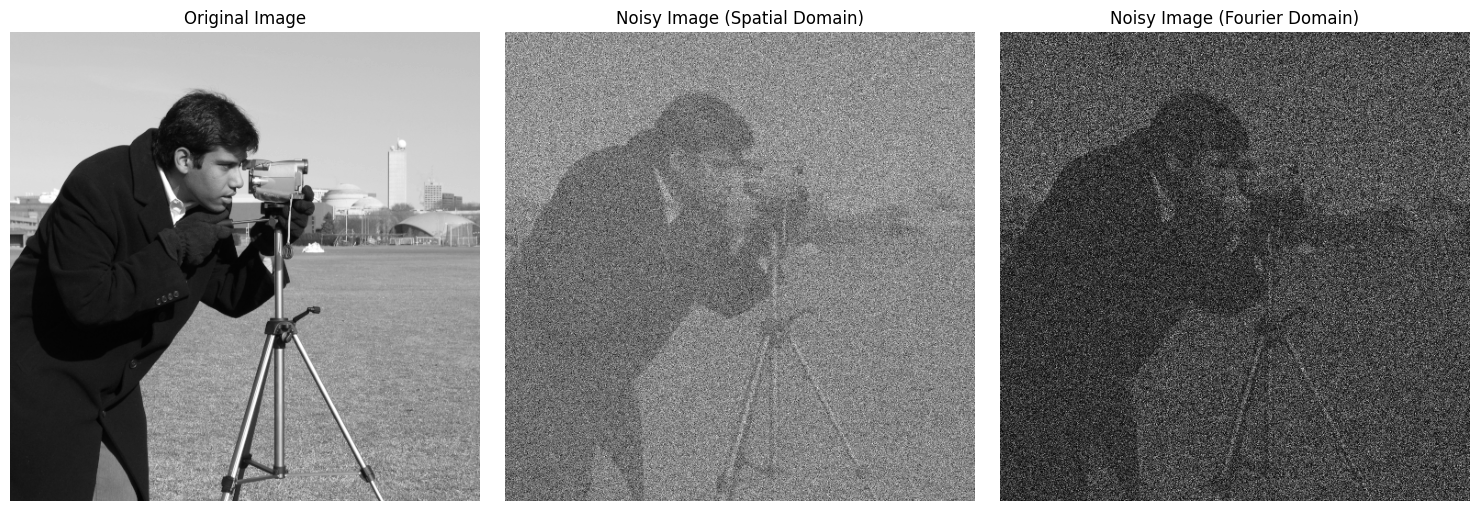

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift, ifftshift

# Function to add Gaussian noise
def add_gaussian_noise(image, sigma):
    noise = np.random.normal(0, sigma, image.shape)
    noisy_image = image + noise
    return noisy_image

# Function to add Gaussian noise in the Fourier domain
def add_gaussian_noise_fourier(image, sigma):
    # Compute the Fourier transform of the image
    image_fft = fft2(image)
    # Generate Gaussian noise in the frequency domain
    noise_fft = np.random.normal(0, sigma, image_fft.shape) + 1j * np.random.normal(0, sigma, image_fft.shape)
    noisy_image_fft = image_fft + noise_fft
    # Transform back to the spatial domain
    noisy_image = np.abs(ifft2(noisy_image_fft))
    return noisy_image

# Load a sample grayscale image (e.g., from matplotlib's sample data)
from skimage import data
image = data.camera() / 255.0  # Normalize the image to [0, 1]

# Add Gaussian noise in spatial and Fourier domains
sigma = 0.5  # Standard deviation of the Gaussian noise
noisy_image_spatial = add_gaussian_noise(image, sigma)
noisy_image_fourier = add_gaussian_noise_fourier(image, sigma*500)

# Display the original and noisy images
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(noisy_image_spatial, cmap='gray')
axs[1].set_title('Noisy Image (Spatial Domain)')
axs[1].axis('off')

axs[2].imshow(noisy_image_fourier, cmap='gray')
axs[2].set_title('Noisy Image (Fourier Domain)')
axs[2].axis('off')

plt.tight_layout()
plt.show()
